In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the historic data
historic_data = pd.read_csv('historic.csv')

# Load the prediction data
prediction_data = pd.read_csv('prediction_input.csv')


In [6]:
# Check the structure of the historic data
print(historic_data.head())


   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top


In [8]:
# Check the structure of the prediction data
print(prediction_data.head())

   item_no    category    main_promotion   color  stars
0   405901  Sweatshirt           Catalog    Blue    3.1
1   644275  Polo-Shirt  Frontpage_Header  Yellow    2.6
2   533070       Tunic           Catalog   Green    2.7
3   829436  Polo-Shirt           Catalog  Yellow    2.6
4   801722       Tunic           Catalog  Yellow    4.9


In [9]:
# Analyze the distribution of the target variable (success_indicator)
historic_data['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [12]:
# Summary statistics
historic_data.describe()

item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000

<Axes: xlabel='success_indicator', ylabel='count'>

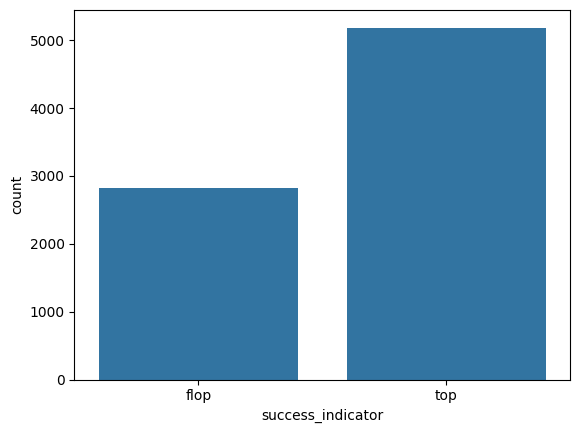

In [15]:
# Distribution of success_indicator
sns.countplot(x='success_indicator', data=historic_data)

<Axes: xlabel='category', ylabel='count'>

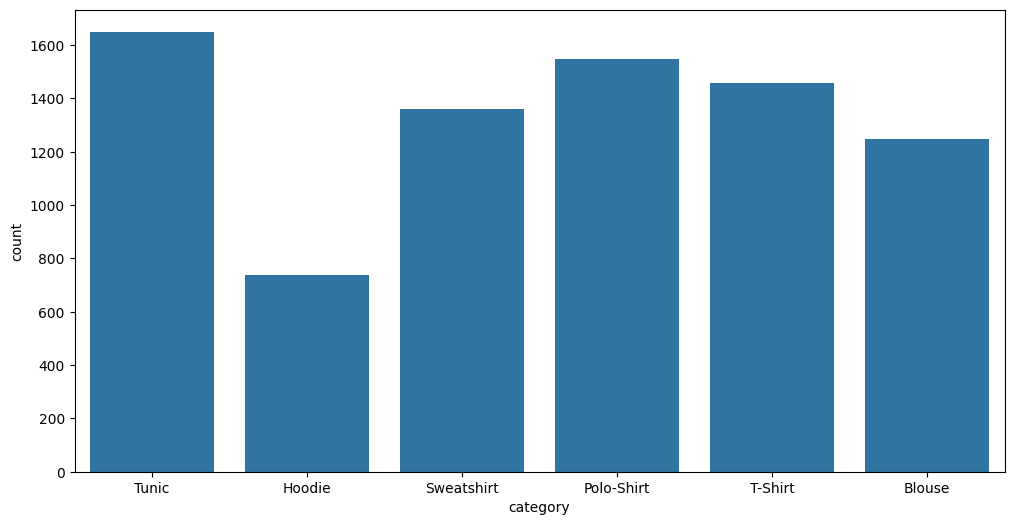

In [16]:
# Distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=historic_data)

<ipython-input-17-664fa4a256d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(historic_data.corr(), annot=True, cmap='coolwarm')


<Axes: >

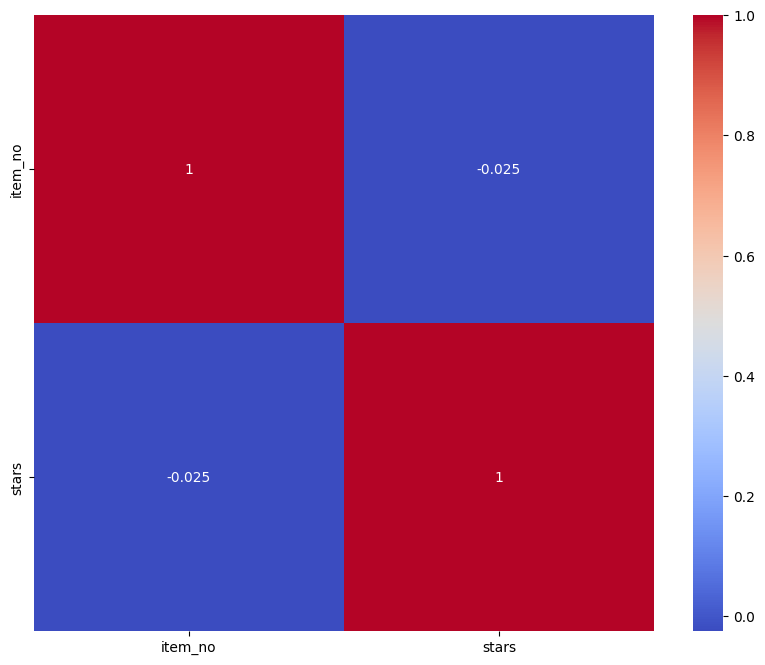

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(historic_data.corr(), annot=True, cmap='coolwarm')

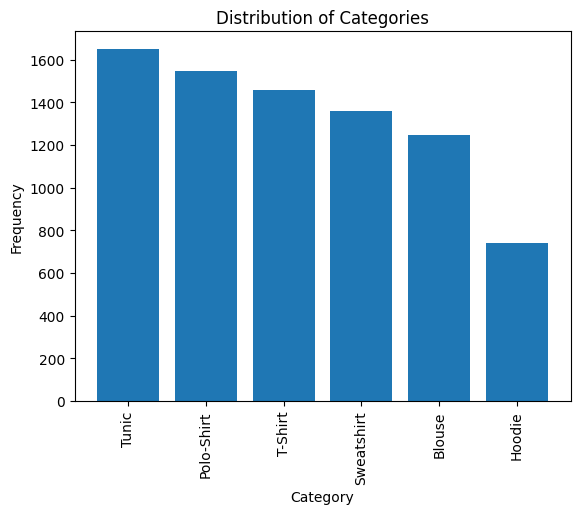

In [19]:
# Visualize the distribution of categorical features
plt.bar(historic_data['category'].value_counts().index, historic_data['category'].value_counts().values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Check data types of features
print(historic_data.dtypes)


item_no                int64
category              object
main_promotion        object
color                 object
stars                float64
success_indicator     object
dtype: object


In [21]:
# Summary statistics for numerical features
print(historic_data.describe())

             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000


In [22]:
# Check for missing values
print(historic_data.isnull().sum())

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64


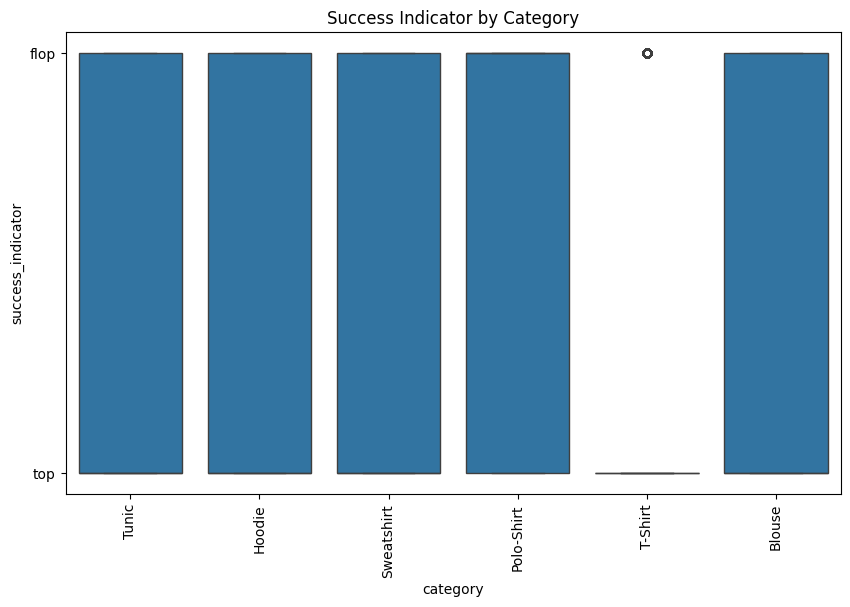

In [25]:
# Explore relationships between categorical features and the target variable
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='success_indicator', data=historic_data)
plt.title('Success Indicator by Category')
plt.xticks(rotation=90)
plt.show()

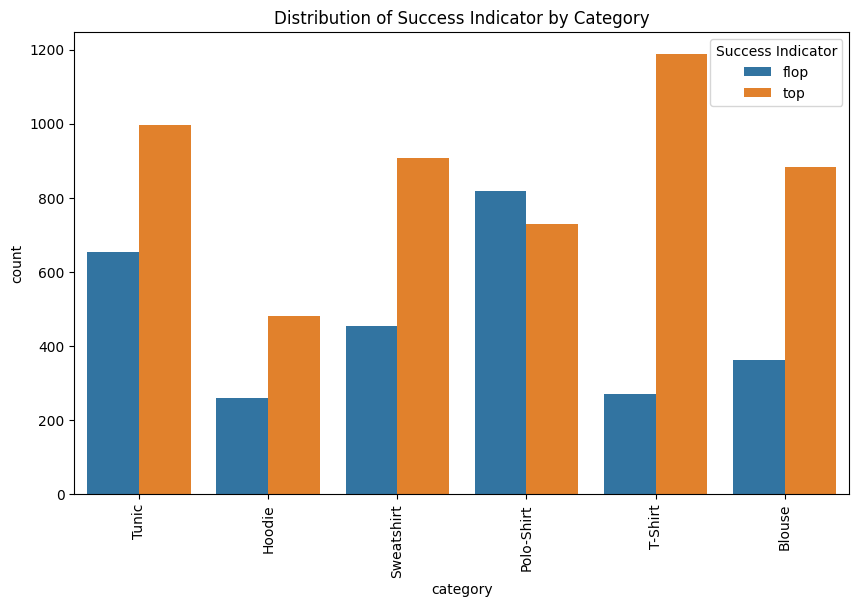

In [26]:
# Explore distribution of target variable across different categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator by Category')
plt.xticks(rotation=90)
plt.legend(title='Success Indicator', loc='upper right')
plt.show()

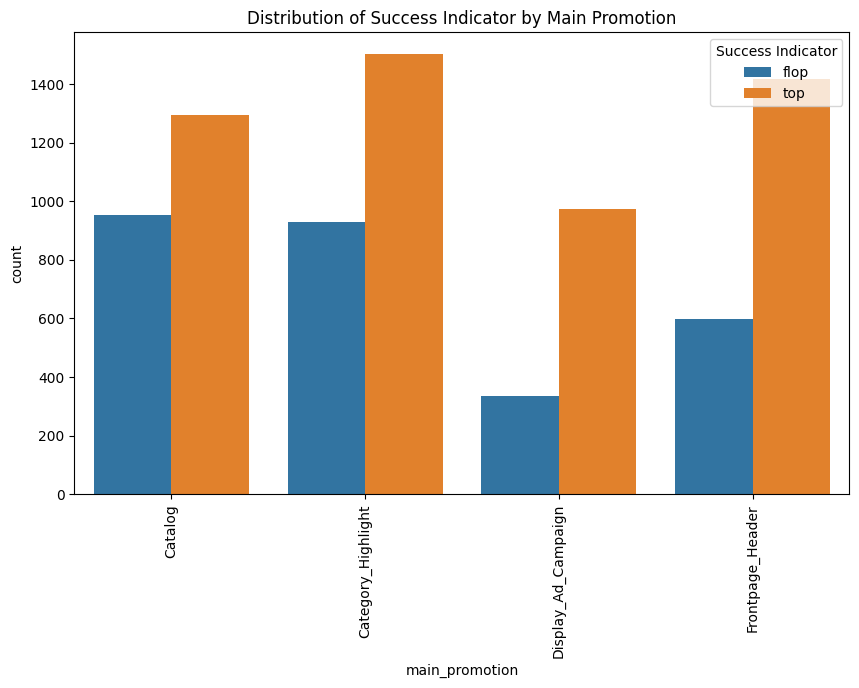

In [27]:
# Explore distribution of target variable across different promotions
plt.figure(figsize=(10, 6))
sns.countplot(x='main_promotion', hue='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator by Main Promotion')
plt.xticks(rotation=90)
plt.legend(title='Success Indicator', loc='upper right')
plt.show()

In [28]:
#descriptive statistic
# Overall statistics
print(historic_data.describe(include="all"))
print(prediction_data.describe(include="all"))

# Grouped statistics by factors that might influence success
print(historic_data.groupby("category")["stars"].describe())
print(historic_data.groupby("main_promotion")["stars"].describe())
print(historic_data.groupby("color")["stars"].describe())

# Calculate success rates for different factors
print(historic_data.groupby("category")["success_indicator"].value_counts(normalize=True))
print(historic_data.groupby("main_promotion")["success_indicator"].value_counts(normalize=True))
print(historic_data.groupby("color")["success_indicator"].value_counts(normalize=True))


              item_no category      main_promotion        color        stars  \
count     8000.000000     8000                8000         8000  8000.000000   
unique            NaN        6                   4           10          NaN   
top               NaN    Tunic  Category_Highlight  Multi-Color          NaN   
freq              NaN     1650                2432         1443          NaN   
mean    546474.338375      NaN                 NaN          NaN     3.473075   
std     256513.463874      NaN                 NaN          NaN     0.978810   
min     100171.000000      NaN                 NaN          NaN     0.300000   
25%     325001.500000      NaN                 NaN          NaN     2.800000   
50%     547081.000000      NaN                 NaN          NaN     3.500000   
75%     764312.250000      NaN                 NaN          NaN     4.200000   
max     989740.000000      NaN                 NaN          NaN     6.100000   

       success_indicator  
count       